In [13]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

import time

# Data exploration

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


Lets take a look at some examples of each class

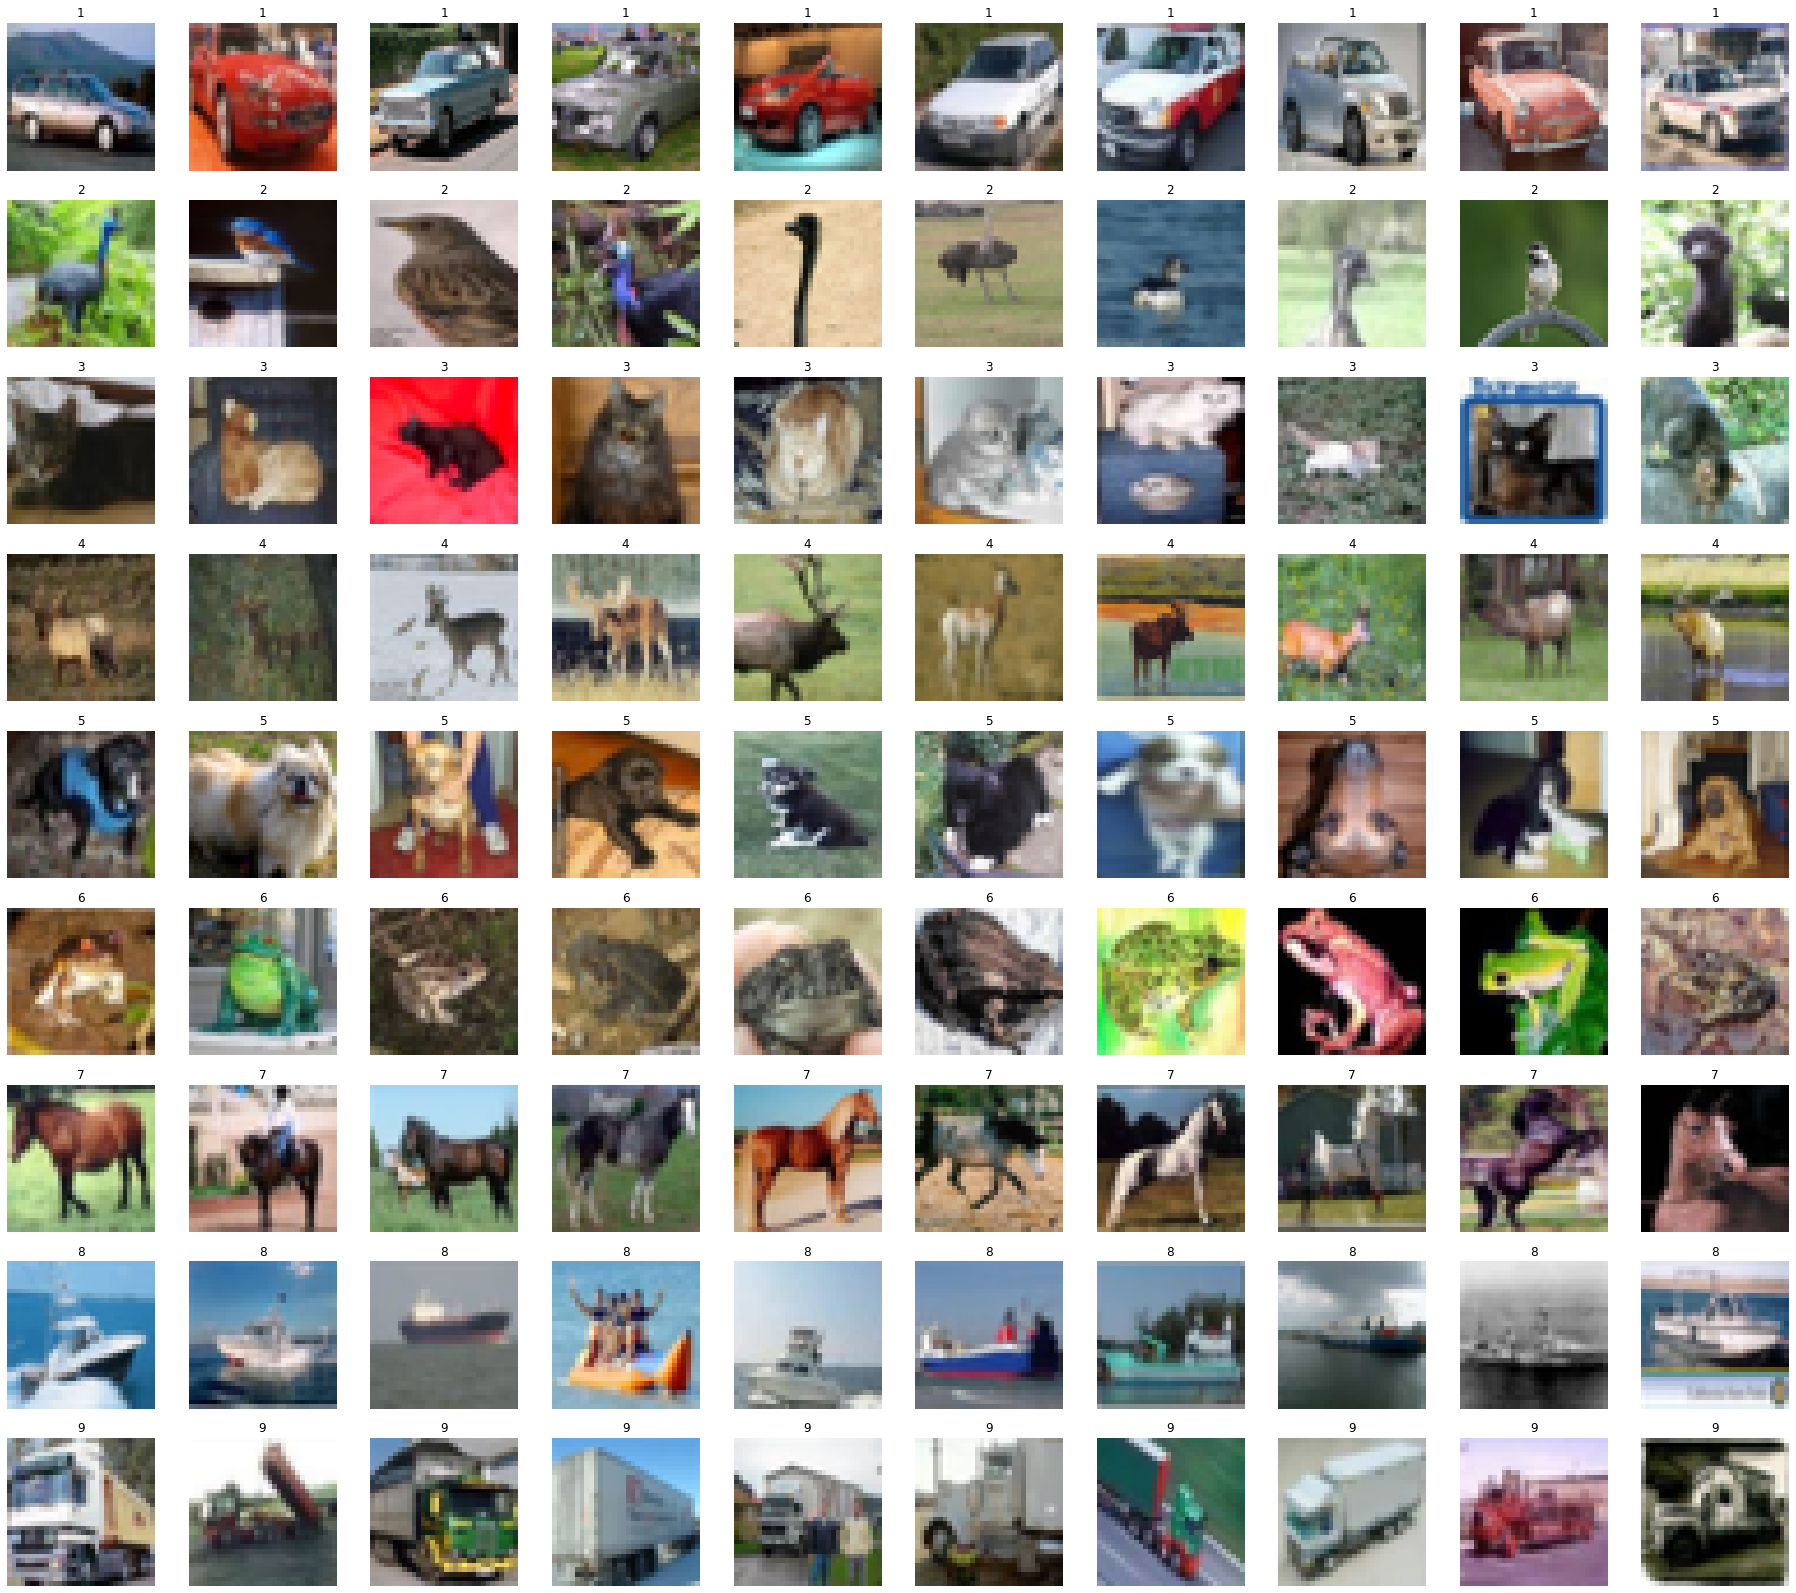

In [3]:
examples = {}
labels = 10
examples_per_label = 10

for i in range(0, x_train.shape[0]):
    if len(examples) == labels and all([len(examples[label]) == examples_per_label for label in examples]):
        break
    
    label = y_train[i][0]
    if label not in examples:
        examples[label] = []
    
    if len(examples[label]) >= examples_per_label:
        continue
        
    examples[label].append(x_train[i])
    
fig=plt.figure(figsize=(32, 32))

i = 1
for label in range(1, labels):
    for example in examples[label]:
        ax = fig.add_subplot(labels, examples_per_label, i)
        ax.set_title(label)    
        plt.imshow(example)
        plt.axis('off')
        i += 1
    
plt.show()

# Naive approach with sklearn

Let's use renown configurations, capable of achieving 97%+ accuracy on mnist and 89%+ accuracy on fashion-mnist.
Whole benchmark available here:
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#

Let's try with colors and grayscale

In [4]:
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [5]:
models = [
    SVC(kernel='rbf', C=10),
    SVC(kernel='poly', C=10),
    SVC(kernel='poly', C=100),
    SVC(kernel='poly', C=10)
]

In [6]:
def test_models(train_data, test_data, excerpt_size=1000):
    train_x, train_y = train_data
    test_x, test_y = test_data
    
    for model in models:
        params = model.get_params()
        kernel = params['kernel']
        c_param = params['C']

        print(f'Training kernel={kernel}, C={c_param}...')

        start_training = time.time()
        excerpt_train_x = np.take(train_x, range(0, excerpt_size), axis=0)
        excerpt_train_y = np.take(train_y, range(0, excerpt_size))
        model.fit(excerpt_train_x, excerpt_train_y)
        end_training = time.time()
        print(f'Training finished, elapsed seconds: {end_training-start_training}')

        print(f'Measuring F1...')
        start_testing = time.time()

        predictions = model.predict(test_x)
        score = f1_score(test_y, predictions, average='weighted')
        end_testing = time.time()
        print(f'F1={score} (elapsed seconds: {end_testing-start_testing})')

        print()

In [7]:
y_train_ravel = np.ravel(y_train)
y_test_ravel = np.ravel(y_test)

### With intact colors:

In [8]:
linear_multicolor_x_train = x_train.reshape((x_train.shape[0],
                                             x_train.shape[1] * x_train.shape[2] * x_train.shape[3]))

linear_multicolor_x_test = x_test.reshape((x_test.shape[0],
                                             x_test.shape[1] * x_test.shape[2] * x_test.shape[3]))

print(f'linear_multicolor_x_train shape: {linear_multicolor_x_train.shape}, y_train_ravel shape: {y_train_ravel.shape}')
print(f'linear_multicolor_x_test shape: {linear_multicolor_x_test.shape}, y_test_ravel shape: {y_test_ravel.shape}')

linear_multicolor_x_train shape: (50000, 3072), y_train_ravel shape: (50000,)
linear_multicolor_x_test shape: (10000, 3072), y_test_ravel shape: (10000,)


In [13]:
test_models(
    train_data=(linear_multicolor_x_train, y_train_ravel),
    test_data=(linear_multicolor_x_test, y_test_ravel),
    excerpt_size=8000
)

Training kernel=poly, C=10...
Training finished, elapsed seconds: 195.73130989074707
Measuring F1...
F1=0.4124514613297535 (elapsed seconds: 178.98000144958496)

Training kernel=poly, C=100...
Training finished, elapsed seconds: 181.39598965644836
Measuring F1...
F1=0.4091216912019624 (elapsed seconds: 177.83599543571472)

Training kernel=rbf, C=10...
Training finished, elapsed seconds: 243.84301042556763
Measuring F1...
F1=0.4689125844714559 (elapsed seconds: 210.09846925735474)

Training kernel=rbf, C=100...
Training finished, elapsed seconds: 268.9208335876465
Measuring F1...
F1=0.4636599512270508 (elapsed seconds: 206.12634468078613)



### With grayscaled images:

In [9]:
grayscaled_x_train = np.mean(x_train, axis=3)
grayscaled_x_test = np.mean(x_test, axis=3)

linear_grayscaled_x_train = grayscaled_x_train.reshape((grayscaled_x_train.shape[0],
                                                        grayscaled_x_train.shape[1] * grayscaled_x_train.shape[2]))

linear_grayscaled_x_test = grayscaled_x_test.reshape((grayscaled_x_test.shape[0],
                                                      grayscaled_x_test.shape[1] * grayscaled_x_test.shape[2]))

print(f'linear_grayscaled_x_train shape: {linear_grayscaled_x_train.shape}, y_train_ravel shape: {y_train_ravel.shape}')
print(f'linear_grayscaled_x_test shape: {linear_grayscaled_x_test.shape}, y_test_ravel shape: {y_test_ravel.shape}')

linear_grayscaled_x_train shape: (50000, 1024), y_train_ravel shape: (50000,)
linear_grayscaled_x_test shape: (10000, 1024), y_test_ravel shape: (10000,)


In [12]:
test_models(
    train_data=(linear_grayscaled_x_train, y_train_ravel),
    test_data=(linear_grayscaled_x_test, y_test_ravel),
    excerpt_size=8000
)

Training kernel=poly, C=10...
Training finished, elapsed seconds: 95.34011316299438
Measuring F1...
F1=0.3237808393861074 (elapsed seconds: 66.67799234390259)

Training kernel=poly, C=100...
Training finished, elapsed seconds: 97.84560966491699
Measuring F1...
F1=0.31829339337775514 (elapsed seconds: 66.10339117050171)

Training kernel=rbf, C=10...
Training finished, elapsed seconds: 102.73529314994812
Measuring F1...
F1=0.3885097423818574 (elapsed seconds: 72.08799195289612)

Training kernel=rbf, C=100...
Training finished, elapsed seconds: 102.84699416160583
Measuring F1...
F1=0.3784897528953187 (elapsed seconds: 71.80098557472229)



# Intermediate results:

There is a base mode with F1=~0.47, which could be used as a sanity check for neural network.

Just as expected, classification of grayscale images has somewhat lower accuracy. 

Unfortunatelly, due to limited computing powers, it is very computationaly expensive to train of full dataset. So, when comparing to sklearn models, neural network should also be trained only on first 8000 examples.

# Neural Network
The first goal is to find the simplest and smallest neural network configuration that would perform the same way on the same dataset, and then build on that.

In [43]:
from tensorflow.keras.utils import to_categorical

def get_excerpt_data(data, take=8000, skip=0):
    x_set, y_set = data
    
    excerpt_x = np.take(x_set, range(skip, take+skip), axis=0)
    excerpt_y = np.take(y_set, range(skip, take+skip))
    excerpt_y = to_categorical(excerpt_y)
    
    return excerpt_x, excerpt_y

excerpt_train_x, excerpt_train_y = get_excerpt_data((x_train, y_train_ravel))
excerpt_validation_x, excerpt_validation_y = get_excerpt_data((x_train, y_train_ravel), 1000, 8000)
excerpt_test_x, excerpt_test_y = get_excerpt_data((x_test, y_test_ravel), 10000)

print(f'Train shapes: x={excerpt_train_x.shape}, y={excerpt_train_y.shape}')
print(f'Validation shapes: x={excerpt_validation_x.shape}, y={excerpt_validation_y.shape}')
print(f'Test shapes: x={excerpt_test_x.shape}, y={excerpt_test_y.shape}')

Train shapes: x=(8000, 32, 32, 3), y=(8000, 10)
Validation shapes: x=(1000, 32, 32, 3), y=(1000, 10)
Test shapes: x=(10000, 32, 32, 3), y=(10000, 10)


In [56]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history, title=''):
    colors = ['r', 'k']
    metrics= ['f1_score', 'accuracy']
    
    x = range(1, len(history['accuracy']) + 1)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.ylim(0, 1.1)
    for i, name in enumerate(metrics):
        plt.plot(x, history[name], colors[i], label=name) 
    plt.title(f'Training {title}')
    plt.legend()
        
    plt.subplot(1, 2, 2)
    plt.ylim(0, 1.1)
    for i, name in enumerate(metrics):
        name = f'val_{name}'
        plt.plot(x, history[name], colors[i], label=name)
    plt.title(f'Validation {title}')
    plt.legend()

In [208]:
from tensorflow.keras.optimizers import RMSprop

def simplest_nn_model():
    inputs = tf.keras.layers.Input((32, 32, 3))
    
    hidden = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
        
    hidden = tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same')(hidden)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(hidden)
    hidden = tf.keras.layers.MaxPool2D((2,2))(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Conv2D(96, (4, 4), activation='relu', padding='valid')(hidden)
    hidden = tf.keras.layers.BatchNormalization()(hidden)
    hidden = tf.keras.layers.Dropout(0.1)(hidden)
    
    hidden = tf.keras.layers.Flatten()(hidden)
    #hidden = tf.keras.layers.Dense(256, activation='relu')(hidden)
    
    outputs = tf.keras.layers.Dense(10, activation='softmax')(hidden)
    
    model = tf.keras.Model(inputs, outputs)
    metrics = [
        tfa.metrics.F1Score(num_classes=10, average="weighted"),
        'accuracy'
    ]
    model.compile(
        optimizer=RMSprop(lr=0.0002),
        loss='categorical_crossentropy',
        metrics=metrics
                 )
    
    print(model.summary())
    
    return model

In [209]:
model = simplest_nn_model()

Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 24)        3480      
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 8, 8, 24)          0  

In [210]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

save_best = ModelCheckpoint('best_weights_val_f1_score.hdf5', save_best_only=True, monitor='val_f1_score', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', mode='min', factor=0.2, patience=5, verbose=1, cooldown=3)

history = model.fit(excerpt_train_x, excerpt_train_y, batch_size=64,
                    validation_data=(excerpt_validation_x, excerpt_validation_y),
                    epochs=25,
                    callbacks=[save_best, reduce_lr]
                   )

Train on 8000 samples, validate on 1000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 316us/sample - loss: 2.1441 - f1_score: 0.2704 - accuracy: 0.2764 - val_loss: 1.8862 - val_f1_score: 0.3100 - val_accuracy: 0.3350
Epoch 2/25
8000/8000 [==============================] - 1s 128us/sample - loss: 1.7437 - f1_score: 0.3804 - accuracy: 0.3850 - val_loss: 1.6139 - val_f1_score: 0.4094 - val_accuracy: 0.4220
Epoch 3/25
8000/8000 [==============================] - 1s 128us/sample - loss: 1.5724 - f1_score: 0.4296 - accuracy: 0.4345 - val_loss: 1.5083 - val_f1_score: 0.4612 - val_accuracy: 0.4610
Epoch 4/25
8000/8000 [==============================] - 1s 127us/sample - loss: 1.4556 - f1_score: 0.4801 - accuracy: 0.4840 - val_loss: 1.4239 - val_f1_score: 0.4920 - val_accuracy: 0.4950
Epoch 5/25
8000/8000 [==============================] - 1s 121us/sample - loss: 1.3790 - f1_score: 0.4990 - accuracy: 0.5024 - val_loss: 1.4260 - val_f1_score: 0.4837 - val_accuracy: 0.4860
Ep

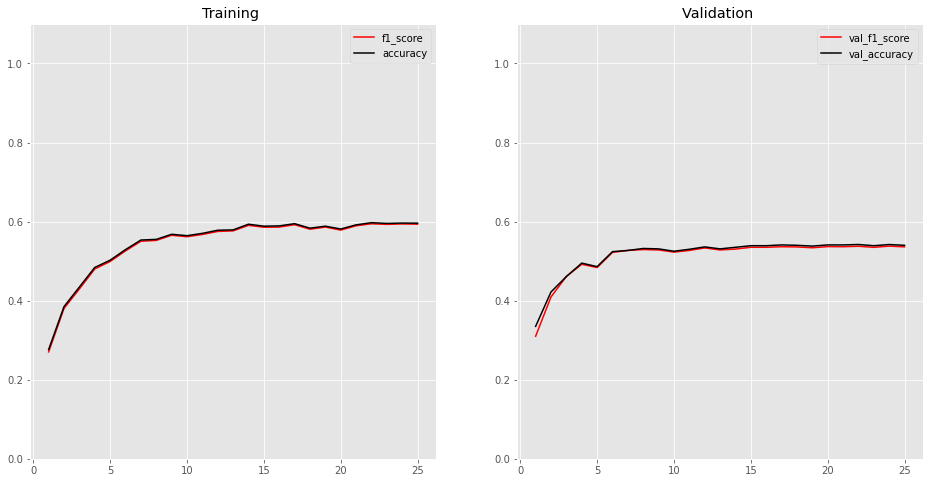

In [211]:
plot_history(history.history)

In [212]:
model.load_weights('best_weights_val_f1_score.hdf5')
model.evaluate(excerpt_test_x, excerpt_test_y)

10000/10000 [==============================] - 1s 108us/sample - loss: 1.2974 - f1_score: 0.5272 - accuracy: 0.5344


[1.297387205696106, 0.5272212, 0.5344]

## Intermediate results:
While F1=~0.53 is far from perfect, it still outshines all previous models from sklearn.

Simple configuration achieves similar scores both in training and validation, there is no overfitting.

Next target is to achive highest possible F1.

### Neural network insights and inspections

In [216]:
visualization_model = tf.keras.Model(model.input, [layer.output for layer in model.layers])

In [220]:
visualization_results = visualization_model.predict(np.array([excerpt_test_x[0,:,:,:]]))

In [232]:
visualization_results[17].shape

(1, 10)

In [225]:
len(visualization_results)

18